In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('ClimateChange_MonthlyStart.csv')

In [5]:
data.head()

,Unnamed: 0,Source,Date,Mean
0,0,GCAG,2016-12,0.7895
1,1,GISTEMP,2016-12,0.8100
2,2,GCAG,2016-11,0.7504
3,3,GISTEMP,2016-11,0.9300
4,4,GCAG,2016-10,0.7292


In [6]:
data.drop(columns='Unnamed: 0', inplace=True)

In [7]:
data.head()

,Source,Date,Mean
0,GCAG,2016-12,0.7895
1,GISTEMP,2016-12,0.8100
2,GCAG,2016-11,0.7504
3,GISTEMP,2016-11,0.9300
4,GCAG,2016-10,0.7292


In [8]:
data = data[data['Source']=='GCAG']

In [9]:
data.head()

,Source,Date,Mean
0,GCAG,2016-12,0.7895
2,GCAG,2016-11,0.7504
4,GCAG,2016-10,0.7292
6,GCAG,2016-09,0.8767
8,GCAG,2016-08,0.8998


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.set_index('Date',drop=True,inplace=True)

In [12]:
data.index

DatetimeIndex(['2016-12-01', '2016-11-01', '2016-10-01', '2016-09-01',
               '2016-08-01', '2016-07-01', '2016-06-01', '2016-05-01',
               '2016-04-01', '2016-03-01',
               ...
               '1880-10-01', '1880-09-01', '1880-08-01', '1880-07-01',
               '1880-06-01', '1880-05-01', '1880-04-01', '1880-03-01',
               '1880-02-01', '1880-01-01'],
              dtype='datetime64[ns]', name='Date', length=1644, freq=None)

In [13]:
data = data.sort_index()

In [14]:
data.head()

,Source,Mean
Date,,
1880-01-01,GCAG,0.0009
1880-02-01,GCAG,-0.1229
1880-03-01,GCAG,-0.1357
1880-04-01,GCAG,-0.0499
1880-05-01,GCAG,-0.0738


In [15]:
data.index.freq='MS'

In [16]:
data.index

DatetimeIndex(['1880-01-01', '1880-02-01', '1880-03-01', '1880-04-01',
               '1880-05-01', '1880-06-01', '1880-07-01', '1880-08-01',
               '1880-09-01', '1880-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Date', length=1644, freq='MS')

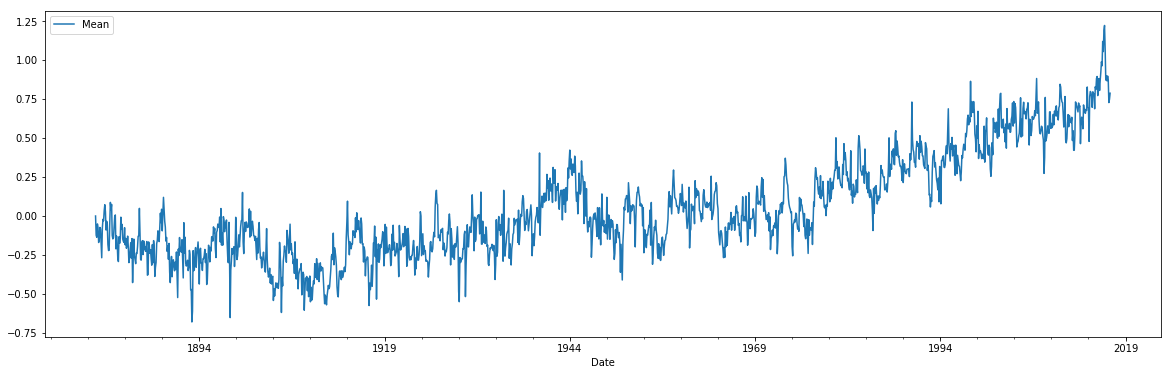

In [17]:
data.plot(figsize=(20,6))

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

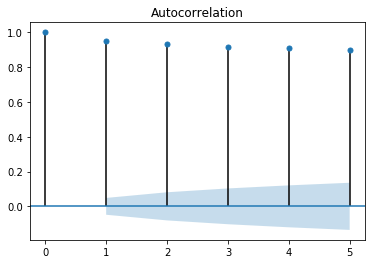

In [19]:
plot_acf(data['Mean'],lags=5);

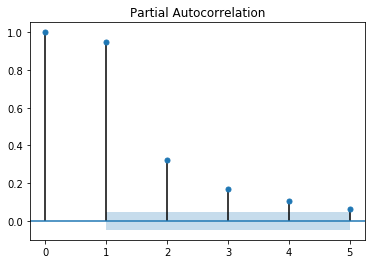

In [20]:
plot_pacf(data['Mean'],lags=5);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Mean'],autolag='AIC')

In [22]:
result

(-0.4995472167184225,
 0.8921048239299925,
 24,
 1619,
 {'1%': -3.434395520959224,
  '5%': -2.8633268625511046,
  '10%': -2.5677212878453477},
 -3042.5048877999643)

In [23]:
result = adfuller(data['Mean'].diff(1).dropna(),autolag='AIC')

In [24]:
result

(-11.832255570392535,
 7.940293414567011e-22,
 23,
 1619,
 {'1%': -3.434395520959224,
  '5%': -2.8633268625511046,
  '10%': -2.5677212878453477},
 -3041.860129875631)

In [25]:
data.drop(columns='Source',inplace=True)
train = data.iloc[:-12]
test = data.iloc[-12:]

In [27]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Mean'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=False)
stepwise_fit.summary()

# ARIMA results = (1,1,3)

/anaconda3/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/anaconda3/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/anaconda3/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 4); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1643
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1560.759
Method:                       css-mle   S.D. of innovations              0.094
Date:                Wed, 15 May 2019   AIC                          -3109.519
Time:                        10:58:45   BIC                          -3077.093
Sample:                             1   HQIC                         -3097.494
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.058      0.040    2.69e-05       0.001
ar.L1.D.y      0.8897      0.026     34.371      0.000       0.839       0.940
ma.L1.D.y     -1.3690      0.036    -37.750      0.000      -1.440      -1.298
ma.L2.D.y      0.3358      0.041      8.124      0.000       0.255       0.417
ma.L3.D.y      0.0460      0.028      1.639      0.101      -0.009       0.101
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1239           +0.0000j            1.1239            0.0000
MA.1            1.0234           +0.0000j            1.0234            0.0000
MA.2            2.0482           +0.0000j            2.0482            0.0000
MA.3          -10.3722           +0.0000j           10.3722            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

model = ARIMA(train['Mean'],order=(1,1,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Mean   No. Observations:                 1631
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1550.423
Method:                       css-mle   S.D. of innovations              0.093
Date:                Wed, 15 May 2019   AIC                          -3088.845
Time:                        10:59:01   BIC                          -3056.464
Sample:                    02-01-1880   HQIC                         -3076.832
                         - 12-01-2015                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.000      2.043      0.041    2.34e-05       0.001
ar.L1.D.Mean     0.8912      0.026     33.868      0.000       0.840       0.943
ma.L1.D.Mean    -1.3750      0.037    -37.494      0.000      -1.447      -1.303
ma.L2.D.Mean     0.3408      0.042      8.189      0.000       0.259       0.422
ma.L3.D.Mean     0.0471      0.028      1.665      0.096      -0.008       0.102
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1221           +0.0000j            1.1221            0.0000
MA.1            1.0238           +0.0000j            1.0238            0.0000
MA.2            2.0182           +0.0000j            2.0182            0.0000
MA.3          -10.2846           +0.0000j           10.2846            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
start = len(train)
end = len(train)+len(test)-1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

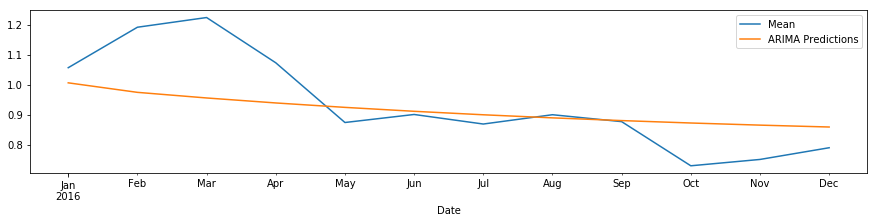

In [30]:
test.plot(figsize=(15,3),legend=True)
predictions.plot(legend=True)

In [31]:
test.mean()

Mean    0.936292
dtype: float64

In [32]:
predictions.mean()

0.9147031839305546

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(np.sqrt(MSE))
print(r2)

0.123226566211986
0.3832349589356232


In [34]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Mean'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=True,m=12)
stepwise_fit.summary()

# SARIMA results = (1,1,2)(0,0,2,12)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1644
Model:             SARIMAX(2, 1, 3)x(2, 0, 1, 12)   Log Likelihood                1563.053
Date:                            Wed, 15 May 2019   AIC                          -3106.106
Time:                                    11:03:39   BIC                          -3052.063
Sample:                                         0   HQIC                         -3086.065
                                           - 1644                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.765e-05   3.83e-05      0.983      0.325   -3.74e-05       0.000
ar.L1          0.0013      0.086      0.015      0.988      -0.168       0.170
ar.L2          0.8372      0.076     10.956      0.000       0.687       0.987
ma.L1         -0.4619      0.087     -5.280      0.000      -0.633      -0.290
ma.L2         -0.8931      0.101     -8.873      0.000      -1.090      -0.696
ma.L3          0.3795      0.037     10.383      0.000       0.308       0.451
ar.S.L12       0.4557      0.184      2.477      0.013       0.095       0.816
ar.S.L24       0.0698      0.027      2.613      0.009       0.017       0.122
ma.S.L12      -0.4209      0.183     -2.303      0.021      -0.779      -0.063
sigma2         0.0087      0.000     36.263      0.000       0.008       0.009
===================================================================================
Ljung-Box (Q):                       38.45   Jarque-Bera (JB):               128.35
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.06
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Mean'],order=(2,1,3),seasonal_order=(2,0,1,12))
results = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
start = len(train)
end = len(train)+len(test)-1

predictions = results.predict(start=start, end=end, typ='levels').rename('SARIMA Predictions')

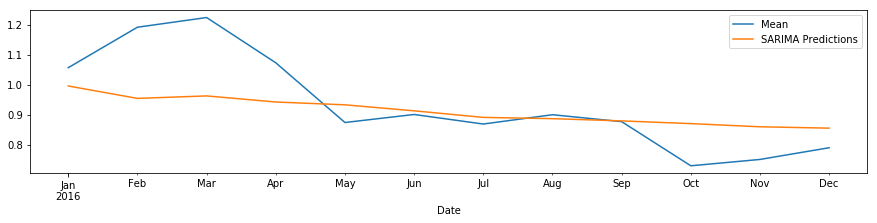

In [37]:
test.plot(figsize=(15,3),legend=True)
predictions.plot(legend=True)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(np.sqrt(MSE))
print(r2)

0.12461538449037077
0.36925418226757367


## LSTM

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train)

train_sc = sc.transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [56]:
X_train.shape

(1631, 1)

In [58]:
X_train_t = X_train[:,None]
X_test_t = X_test[:,None]

In [59]:
X_train_t.shape

(1631, 1, 1)

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import keras.backend as K

In [64]:
np.random.seed(7)
K.clear_session()
model = Sequential()
model.add(LSTM(7, input_shape=(1,1),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.001))
model.fit(X_train_t,y_train,validation_data=(X_test_t,y_test),epochs=200)

Train on 1631 samples, validate on 11 samples
Epoch 1/200
1631/1631 [==============================] - 1s 534us/step - loss: 1.0062 - val_loss: 8.1564
Epoch 2/200
1631/1631 [==============================] - 0s 80us/step - loss: 0.9062 - val_loss: 7.1272
Epoch 3/200
1631/1631 [==============================] - 0s 88us/step - loss: 0.7829 - val_loss: 5.9224
Epoch 4/200
1631/1631 [==============================] - 0s 79us/step - loss: 0.6333 - val_loss: 4.3501
Epoch 5/200
1631/1631 [==============================] - 0s 78us/step - loss: 0.4675 - val_loss: 2.6891
Epoch 6/200
1631/1631 [==============================] - 0s 81us/step - loss: 0.3121 - val_loss: 1.2906
Epoch 7/200
1631/1631 [==============================] - 0s 80us/step - loss: 0.1960 - val_loss: 0.4579
Epoch 8/200
1631/1631 [==============================] - 0s 81us/step - loss: 0.1347 - val_loss: 0.1578
Epoch 9/200
1631/1631 [==============================] - 0s 81us/step - loss: 0.1124 - val_loss: 0.1573
Epoch 10/200
1631

1631/1631 [==============================] - 0s 72us/step - loss: 0.1037 - val_loss: 0.1635
Epoch 79/200
1631/1631 [==============================] - 0s 74us/step - loss: 0.1036 - val_loss: 0.1519
Epoch 80/200
1631/1631 [==============================] - 0s 79us/step - loss: 0.1036 - val_loss: 0.1502
Epoch 81/200
1631/1631 [==============================] - 0s 76us/step - loss: 0.1036 - val_loss: 0.1487
Epoch 82/200
1631/1631 [==============================] - 0s 74us/step - loss: 0.1038 - val_loss: 0.1385
Epoch 83/200
1631/1631 [==============================] - 0s 76us/step - loss: 0.1036 - val_loss: 0.1485
Epoch 84/200
1631/1631 [==============================] - 0s 77us/step - loss: 0.1035 - val_loss: 0.1632
Epoch 85/200
1631/1631 [==============================] - 0s 80us/step - loss: 0.1036 - val_loss: 0.1525
Epoch 86/200
1631/1631 [==============================] - 0s 80us/step - loss: 0.1036 - val_loss: 0.1505
Epoch 87/200
1631/1631 [==============================] - 0s 81us/st

1631/1631 [==============================] - 0s 79us/step - loss: 0.1034 - val_loss: 0.1126
Epoch 156/200
1631/1631 [==============================] - 0s 75us/step - loss: 0.1034 - val_loss: 0.1120
Epoch 157/200
1631/1631 [==============================] - 0s 73us/step - loss: 0.1033 - val_loss: 0.1117
Epoch 158/200
1631/1631 [==============================] - 0s 75us/step - loss: 0.1033 - val_loss: 0.1044
Epoch 159/200
1631/1631 [==============================] - 0s 75us/step - loss: 0.1032 - val_loss: 0.1084
Epoch 160/200
1631/1631 [==============================] - 0s 78us/step - loss: 0.1033 - val_loss: 0.1127
Epoch 161/200
1631/1631 [==============================] - 0s 78us/step - loss: 0.1034 - val_loss: 0.1140
Epoch 162/200
1631/1631 [==============================] - 0s 81us/step - loss: 0.1031 - val_loss: 0.1045
Epoch 163/200
1631/1631 [==============================] - 0s 80us/step - loss: 0.1033 - val_loss: 0.1114
Epoch 164/200
1631/1631 [==============================] - 0

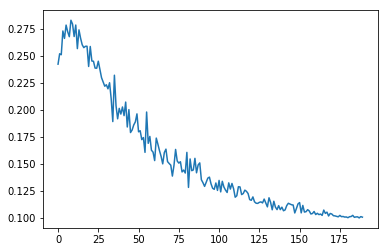

In [65]:
plt.plot(model.history.history['val_loss'][10:])

In [66]:
predictions = model.predict(X_test_t)
predictions_sc = sc.inverse_transform(predictions)

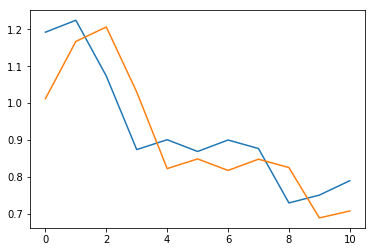

In [74]:
plt.plot(test[1:].values)
plt.plot(predictions_sc)

In [75]:
MSE = mean_squared_error(test[1:], predictions_sc)
r2 = r2_score(test[1:], predictions_sc)

print(np.sqrt(MSE))
print(r2)

0.10081410180544051
0.600108817740227


## Feedforward NN

In [76]:
model = Sequential()
model.add(Dense(7, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Train on 1631 samples, validate on 11 samples
Epoch 1/200
1631/1631 [==============================] - 0s 206us/step - loss: 0.3306 - val_loss: 0.1660
Epoch 2/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.2353 - val_loss: 0.0946
Epoch 3/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1728 - val_loss: 0.0904
Epoch 4/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1367 - val_loss: 0.0910
Epoch 5/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1194 - val_loss: 0.0914
Epoch 6/200
1631/1631 [==============================] - 0s 28us/step - loss: 0.1127 - val_loss: 0.0901
Epoch 7/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1100 - val_loss: 0.0896
Epoch 8/200
1631/1631 [==============================] - 0s 28us/step - loss: 0.1087 - val_loss: 0.0897
Epoch 9/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1077 - val_loss: 0.0895
Epoch 10/200
1631

1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0908
Epoch 79/200
1631/1631 [==============================] - 0s 31us/step - loss: 0.1031 - val_loss: 0.0912
Epoch 80/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1031 - val_loss: 0.0904
Epoch 81/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1029 - val_loss: 0.0905
Epoch 82/200
1631/1631 [==============================] - 0s 28us/step - loss: 0.1029 - val_loss: 0.0914
Epoch 83/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1031 - val_loss: 0.0945
Epoch 84/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1029 - val_loss: 0.0904
Epoch 85/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1029 - val_loss: 0.0904
Epoch 86/200
1631/1631 [==============================] - 0s 29us/step - loss: 0.1031 - val_loss: 0.0902
Epoch 87/200
1631/1631 [==============================] - 0s 28us/st

/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158251). Check your callbacks.
  % delta_t_median)


1631/1631 [==============================] - 0s 30us/step - loss: 0.1029 - val_loss: 0.0903
Epoch 101/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0912
Epoch 102/200
1631/1631 [==============================] - 0s 36us/step - loss: 0.1029 - val_loss: 0.0908
Epoch 103/200
1631/1631 [==============================] - 0s 39us/step - loss: 0.1029 - val_loss: 0.0906
Epoch 104/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0934
Epoch 105/200
1631/1631 [==============================] - 0s 27us/step - loss: 0.1030 - val_loss: 0.0905
Epoch 106/200
1631/1631 [==============================] - 0s 28us/step - loss: 0.1031 - val_loss: 0.0904
Epoch 107/200
1631/1631 [==============================] - 0s 27us/step - loss: 0.1029 - val_loss: 0.0904
Epoch 108/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1028 - val_loss: 0.0928
Epoch 109/200
1631/1631 [==============================] - 0

1631/1631 [==============================] - 0s 32us/step - loss: 0.1031 - val_loss: 0.0918
Epoch 178/200
1631/1631 [==============================] - 0s 32us/step - loss: 0.1029 - val_loss: 0.0912
Epoch 179/200
1631/1631 [==============================] - 0s 31us/step - loss: 0.1029 - val_loss: 0.0917
Epoch 180/200
1631/1631 [==============================] - 0s 31us/step - loss: 0.1030 - val_loss: 0.0908
Epoch 181/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0904
Epoch 182/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1032 - val_loss: 0.0920
Epoch 183/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1031 - val_loss: 0.0903
Epoch 184/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0908
Epoch 185/200
1631/1631 [==============================] - 0s 30us/step - loss: 0.1030 - val_loss: 0.0907
Epoch 186/200
1631/1631 [==============================] - 0

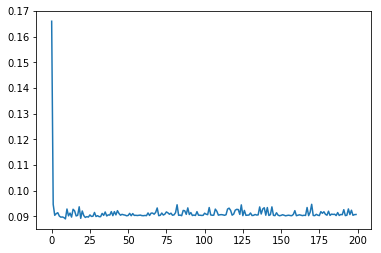

In [78]:
plt.plot(model.history.history['val_loss'])

In [79]:
predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)

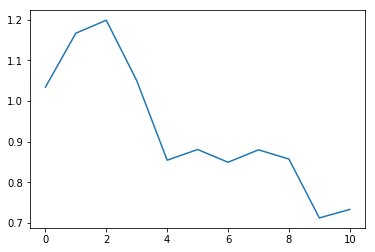

In [80]:
plt.plot(predictions)

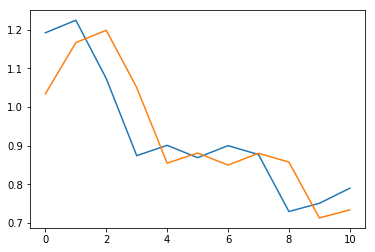

In [81]:
plt.plot(test[1:].values)
plt.plot(predictions)

In [82]:
MSE = mean_squared_error(test[1:], predictions)
r2 = r2_score(test[1:], predictions)

print(np.sqrt(MSE))
print(r2)

0.09576390116629162
0.6391697683986877
